#### Useful references

https://docs.python.org/3.7/library/pickle.html

https://scikit-learn.org/stable/modules/model_persistence.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# for OLS using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


### Data generation and plotting

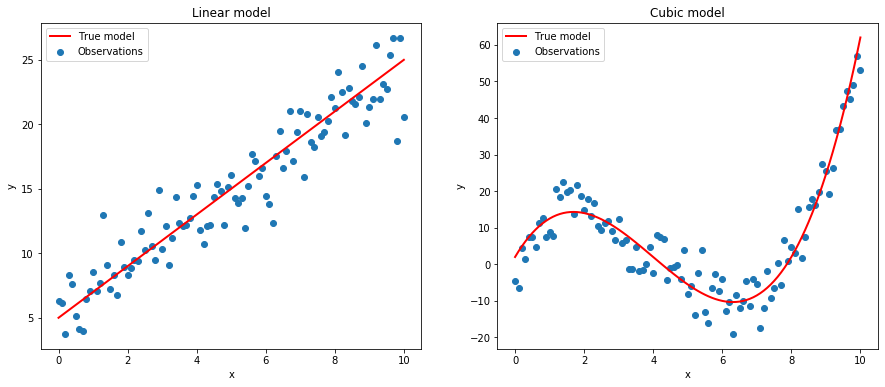

In [2]:
# generate the data set
ns = 101 # number of samples
x = np.linspace(0,10,ns)

# linear model
c1 = np.array([2, 5])
yl = np.polyval(c1,x) # y = 2x + 5  (true model)
y1 = yl + 2*np.random.randn(ns) # observed data has noise: gaussian noise

# cubic model
sigma2 = 5
c3 = np.array([0.5, -6, 16, 2 ]) # coeff for (x**3, x**2, x, 1)
yc = np.polyval(c3,x)
y3 = yc + sigma2*np.random.randn(ns)

# Plot the true model and the observed data
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15,6))
axs[0].scatter(x,y1, label='Observations')
axs[0].plot(x,yl, 'r', linewidth=2, label='True model')
axs[0].set(xlabel='x', ylabel='y', title = "Linear model")
axs[0].legend()

axs[1].scatter(x,y3, label='Observations')
axs[1].plot(x,yc, 'r', linewidth=2, label='True model')
axs[1].set(xlabel='x', ylabel='y', title = "Cubic model")
axs[1].legend()

plt.show()

## Training OLS models using sklearn

Linear model coefficients
True           2.00000   5.00000
Estimated:     1.87671   5.48933

Cubic model coefficients
True           0.50000  -6.00000  16.00000   2.00000
Estimated:     0.50035  -6.10335  17.04370   0.14996


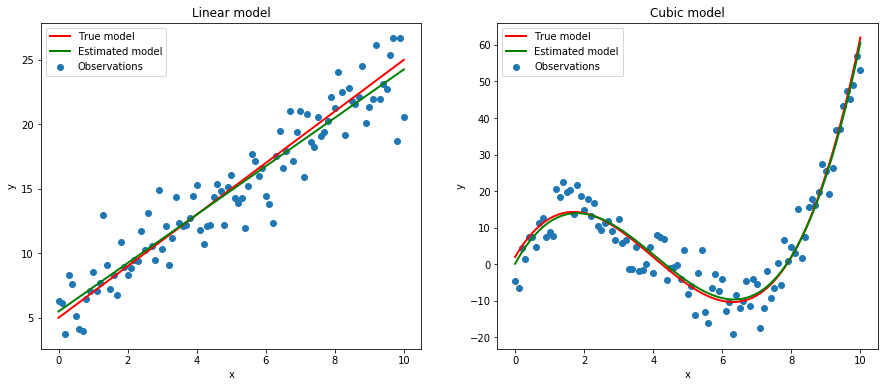

In [5]:
# Linear model
clf1 = LinearRegression()
# fit3.fit(x,y1)
clf1.fit(x[:, np.newaxis],y1)
y1_hat = clf1.predict(x[:, np.newaxis])


frmt = "{:<12}"+"{:10.5f}"*2

print('Linear model coefficients')
print(frmt.format("True", *c1))
print(frmt.format("Estimated: ", *clf1.coef_, clf1.intercept_))



# creating the cubic model regression object
clf3 = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression(fit_intercept=False))])
# fit using our data
clf3 = clf3.fit(x[:, np.newaxis],y3)
# predict new data
y3_hat = clf3.predict(x[:, np.newaxis])

frmt = "{:<12}"+"{:10.5f}"*4
print('\nCubic model coefficients')
print(frmt.format("True", *c3))
print(frmt.format("Estimated: ", *clf3.named_steps['linear'].coef_[::-1]))


# Plot the true model and the observed data
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15,6))
axs[0].scatter(x,y1, label='Observations')
axs[0].plot(x,yl, 'r', linewidth=2, label='True model')
axs[0].plot(x,y1_hat, 'g', linewidth=2, label='Estimated model')
axs[0].set(xlabel='x', ylabel='y', title = "Linear model")
axs[0].legend()

axs[1].scatter(x,y3, label='Observations')
axs[1].plot(x,yc, 'r', linewidth=2, label='True model')
axs[1].plot(x,y3_hat, 'g', linewidth=2, label='Estimated model')
axs[1].set(xlabel='x', ylabel='y', title = "Cubic model")
axs[1].legend()

plt.show()

# Using pickle to serialize objects in general
## Read the documentation on object saving in sklearn
https://docs.python.org/3.7/library/pickle.html

https://scikit-learn.org/stable/modules/model_persistence.html

In [7]:
import pickle

with open('model.dat','wb') as myfile:
    pickle.dump(clf1, myfile)

Loaded Linear model coefficients
True           2.00000   5.00000
Loaded:        2.05710   4.73359


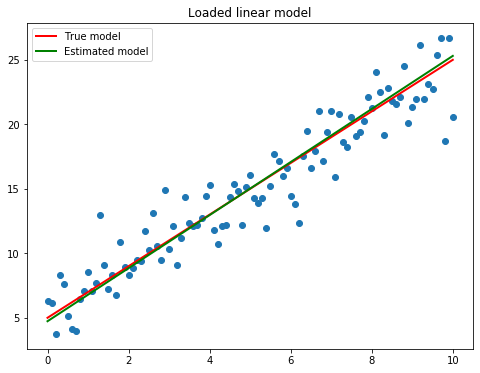

In [3]:
with open('model.dat','rb') as myfile:
    clf1_loaded = pickle.load(myfile)


y1_loaded = clf1_loaded.predict(x[:, np.newaxis])

frmt = "{:<12}"+"{:10.5f}"*2
print('Loaded Linear model coefficients')
print(frmt.format("True", *c1))
print(frmt.format("Loaded: ", *clf1_loaded.coef_, clf1_loaded.intercept_))

plt.figure(figsize=(8,6))
plt.scatter(x,y1)
plt.plot(x,yl, 'r', linewidth=2, label='True model')
plt.plot(x,y1_loaded, 'g', linewidth=2, label='Estimated model')
plt.title("Loaded linear model")
plt.legend()
plt.show()

# Using joblib to serialize the scikit-learn objects
## Read the documentation on object saving in sklearn

https://scikit-learn.org/stable/modules/model_persistence.html

In [6]:
from joblib import load, dump

# save the model
dump(clf3, 'model.joblib')

['model.joblib']


Loaded cubic model coefficients
True           0.50000  -6.00000  16.00000   2.00000
Estimated:     0.50509  -6.10791  16.20398   3.61018


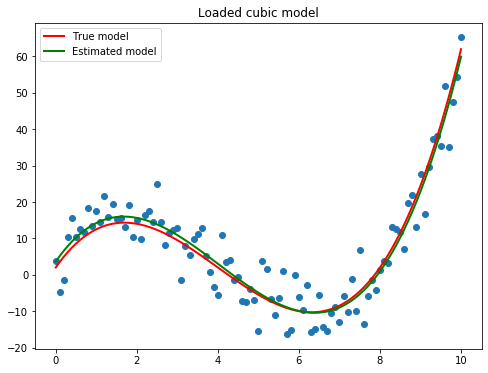

In [7]:
# load the model
clf3_loaded = load('model.joblib')

# predict new data
y3_loaded = clf3_loaded.predict(x[:, np.newaxis])

frmt = "{:<12}"+"{:10.5f}"*4
print('\nLoaded cubic model coefficients')
print(frmt.format("True", *c3))
print(frmt.format("Estimated: ", *clf3_loaded.named_steps['linear'].coef_[::-1]))


plt.figure(figsize=(8,6))
plt.scatter(x,y3)
plt.plot(x,yc, 'r', linewidth=2, label='True model')
plt.plot(x,y3_loaded, 'g', linewidth=2, label='Estimated model')
plt.title("Loaded cubic model")
plt.legend()
plt.show()